# metagenome_analysis - Week 1 output
## Analyzing a microbial metagenome obtained from radioactive soil
 
## 1. Bacterial genome assembly - Spades meta running   
First, in order to assemble the metagenome into contigs, the following SPAdes command was called
> `spades -1 /data/metagenomes/160523Alm_D16-4703_1_sequence.fastq.gz -2 /data/metagenomes/160523Alm_D16-4703_2_sequence.fastq.gz --meta -o spades_final_proj_output -m 16 -t 2`

As the below error suggests, there's no ~190G memory for the file to be processed successfully, and so following the instruction, the output log is attached and histogram cannot be plotted successfully.

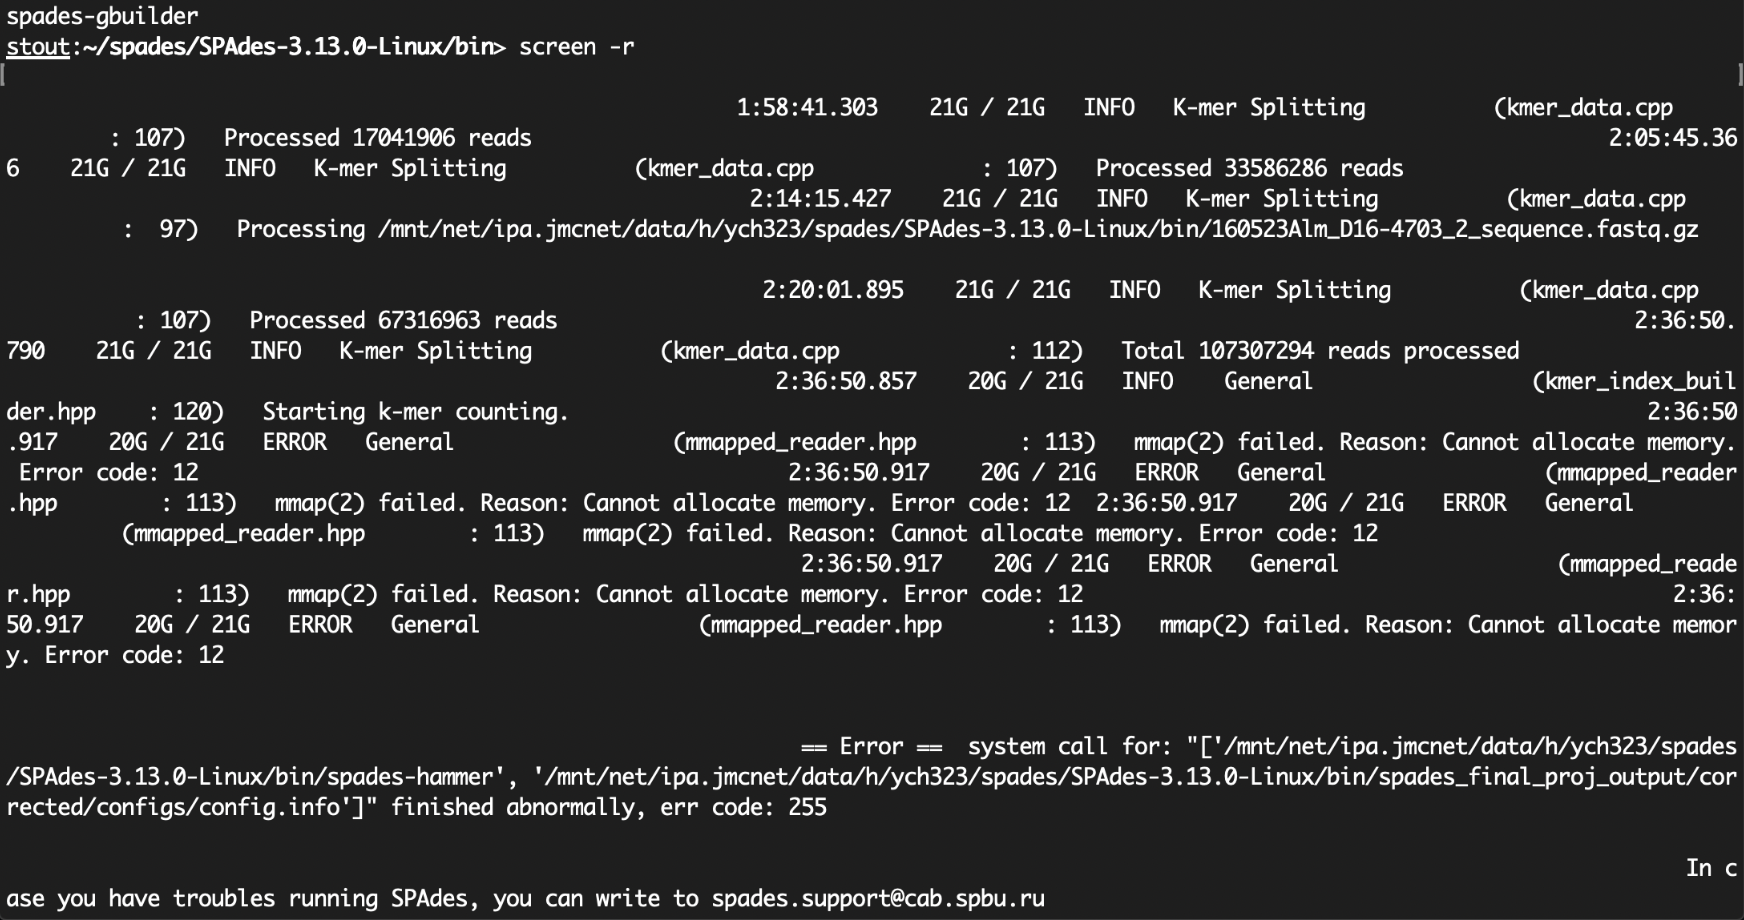

In [1]:
from IPython.display import Image, display
img0 = Image(filename = "img/run_log.PNG")
img0

## 2. Quantify abundance of microbes: upload both fastq files onto the one codex server, run annotation
In order to quantify the abundance of different microbes, the two metagenome files were uploaded one codex. The results are as follows.  
> `onecodex upload /data/metagenomes/160523Alm_D16-4703_1_sequence.fastq.gz` `onecodex upload /data/metagenomes/160523Alm_D16-4703_2_sequence.fastq.gz`

## Analysis Results

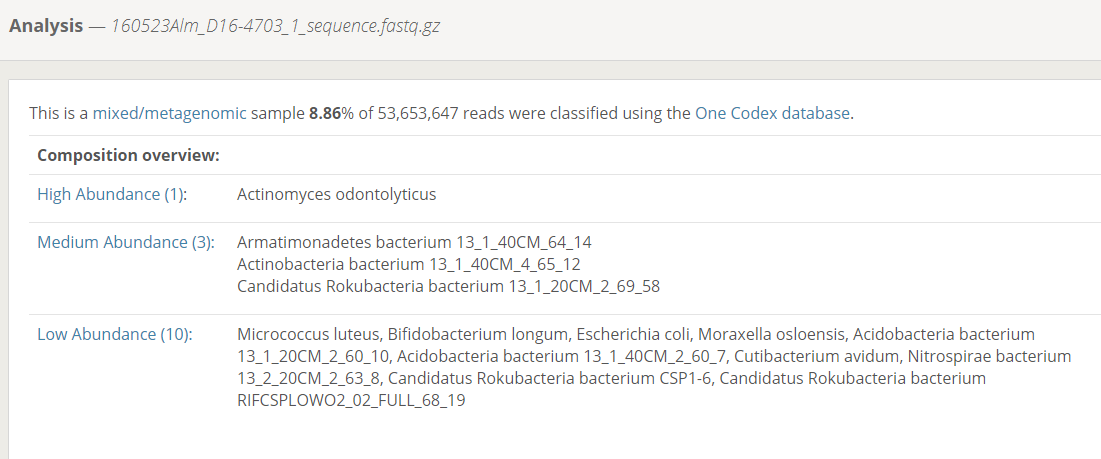

In [5]:
from IPython.display import Image, display
img1 = Image(filename = "img/analysis1.PNG")
img1

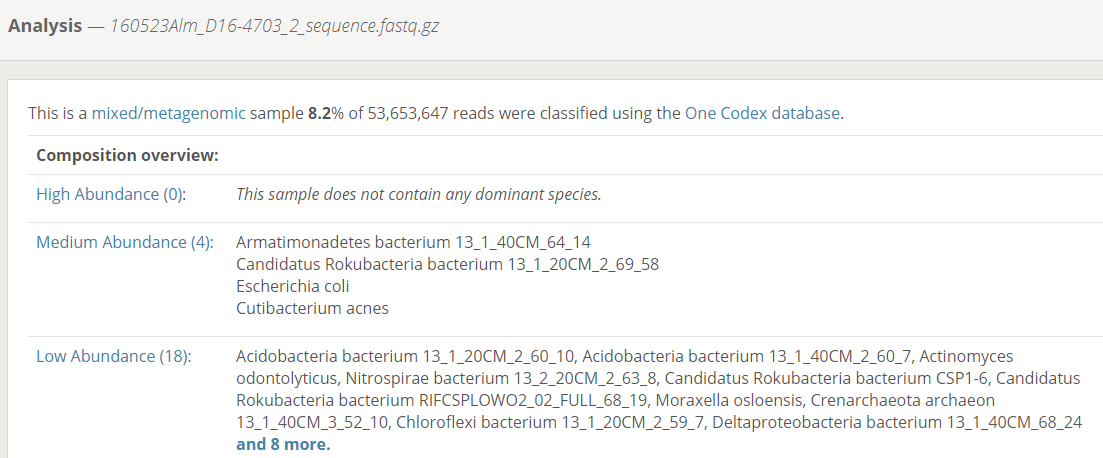

In [4]:
img2 = Image(filename = "img/analysis2.PNG")
img2

> From the above graph we can see that the most dominant composition in _160523Alm_D16-4703_1_sequence.fastq.gz_(hereafter referred as sequence 1) is Actinomyces odontolyticus (27.88%) while the most dominant composition in _160523Alm_D16-4703_2_sequence.fastq.gz_(hereafter referred as sequence 2) is Armatimonadetes bacterium (16.48%).
The bacterial repository in sequence 2 is obviously more diverse, with 22 spicies marked as at least low abundance.

## Sample Composition

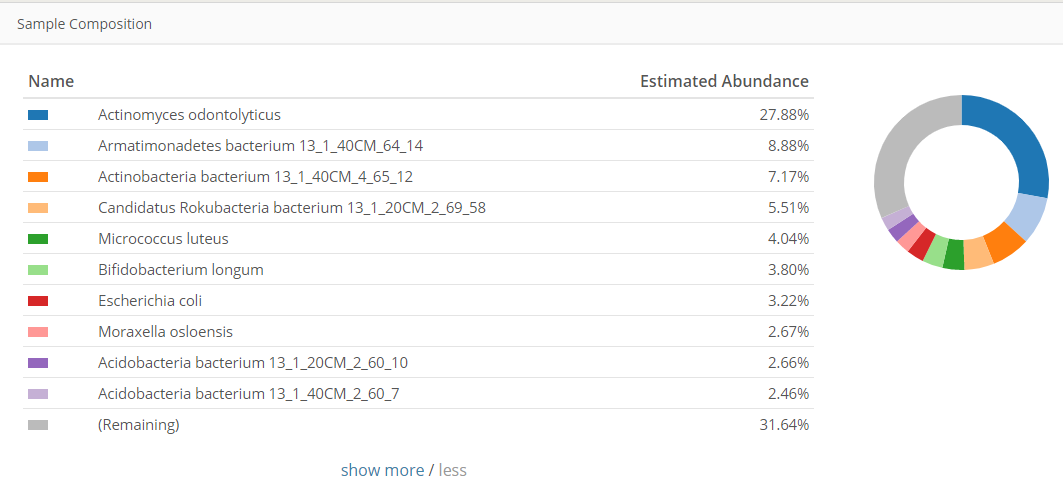

In [6]:
img3 = Image(filename = "img/compo1.PNG")
img3

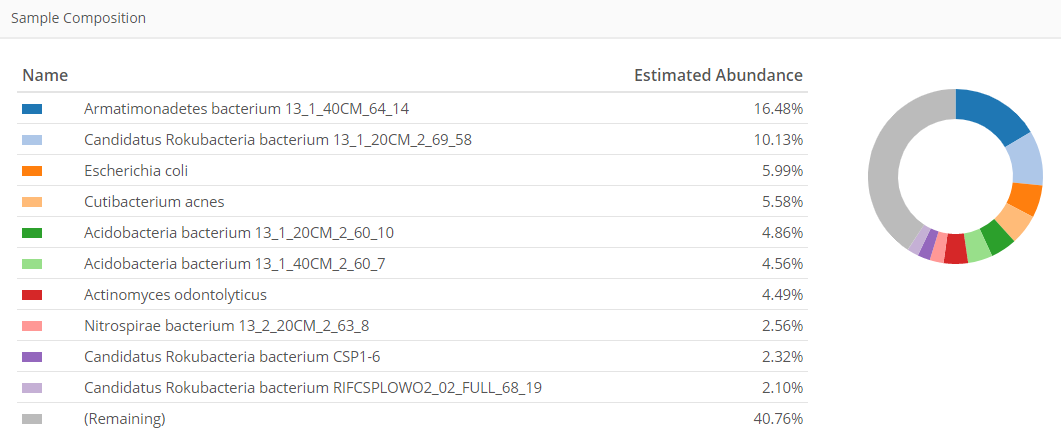

In [7]:
img4 = Image(filename = "img/compo2.PNG")
img4

> The composition graph again confirms the summary obtained above. It is worth noting that the percentages of bacterials that are not in the top ten are high in both sequences (31.64% and 40.76% respectively).

>The noticeable difference is that Actinomyces odontolyticus, which is the most abundant organism in sequence 1, only covers 4.49% in sequence 2.

>The obvious overlappings are:
- Armatimonadetes bacterium 13_1_40CM_64_14;
- Candidatus Rokubacteria bacterium 13_1_20CM_2_69_58
- Acidobacteria bacterium 13_1_20CM_2_60_10
- Acidobacteria bacterium 13_1_40CM_2_60_7

## Taxonomic Chart

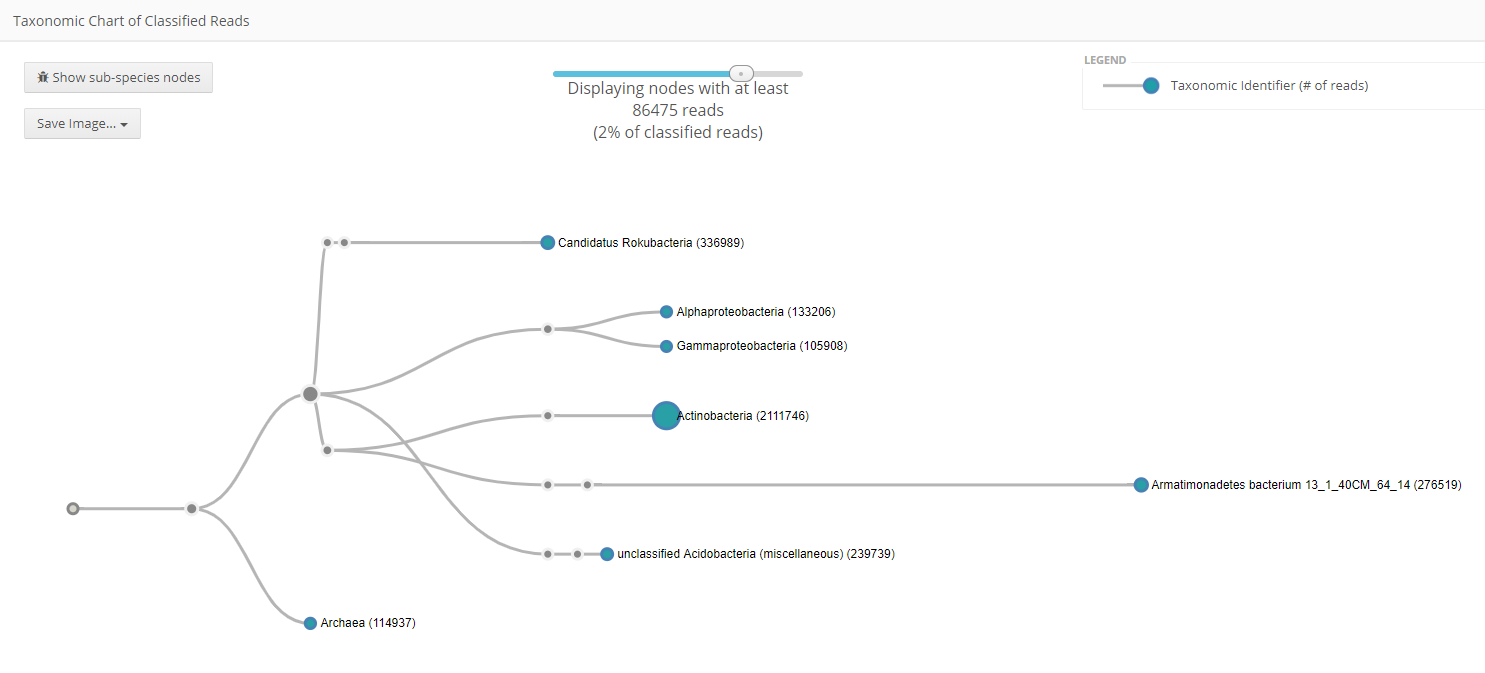

In [9]:
img5 = Image(filename = "img/taxo1.PNG")
img5

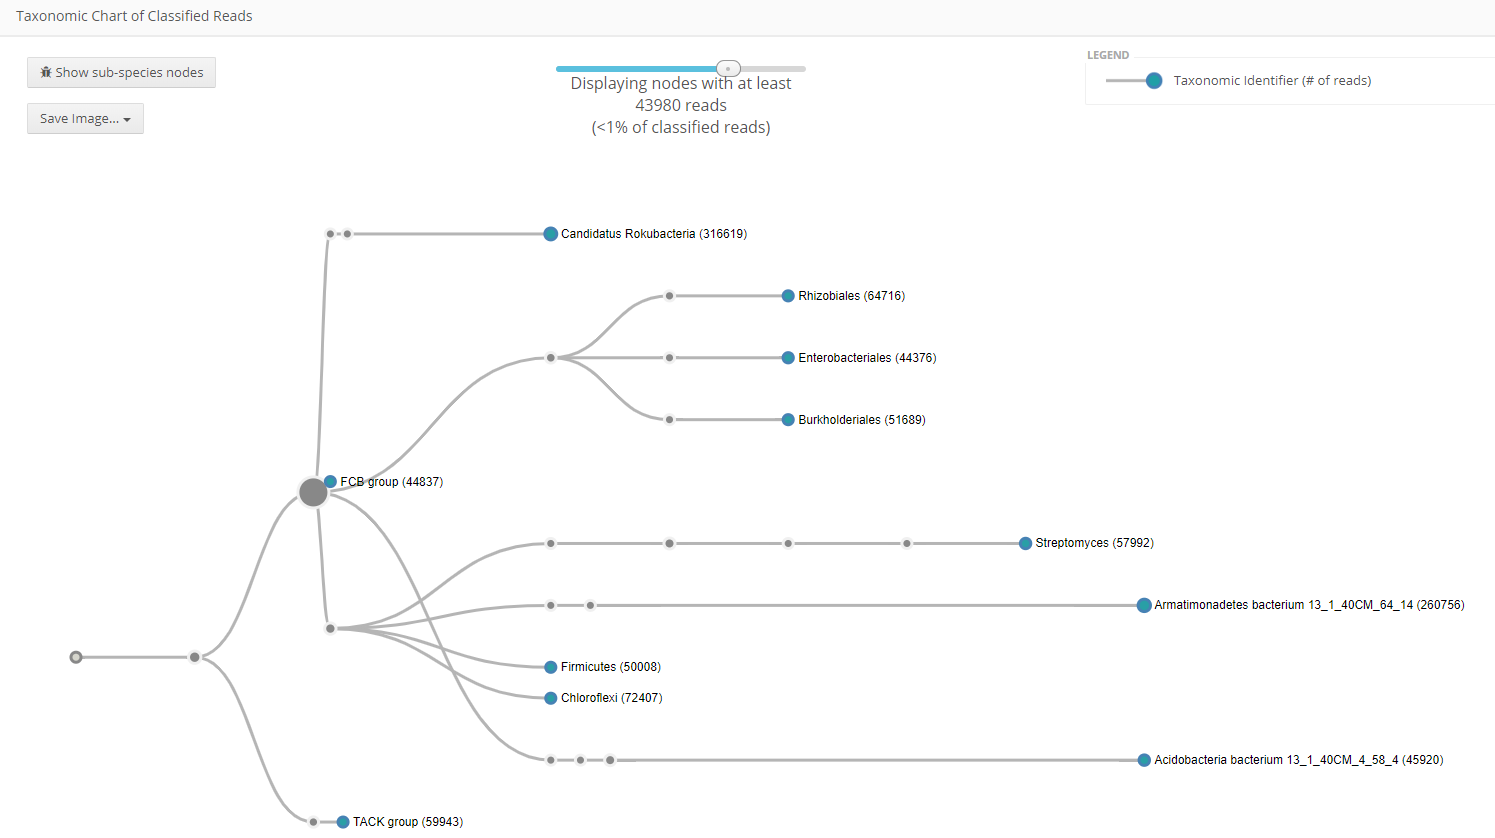

In [10]:
img6 = Image(filename = "img/taxo2.PNG")
img6

>In both sequences, most organisms other than archea are in the bacteria superkingdom.
>The pylums that are common in both sequences are Candidatus Rokubacteria, Proteobacteria, Actinobacteria, and Frimicutes. As the above results demonstrate, the most abundant microbes living the in the soil include Actinomyes Odontolyticus(~28%), Armatimonadetes bacteria(~9%), Actinobacteria(~7%), Candidatus Rokubacteria (~5.5%), and several others all found at <5% abundance. It is important to note that over 30% of the bacteria found in the soil were not identified, likely due to their being found in trace amounts.

## FASTQ Comparison

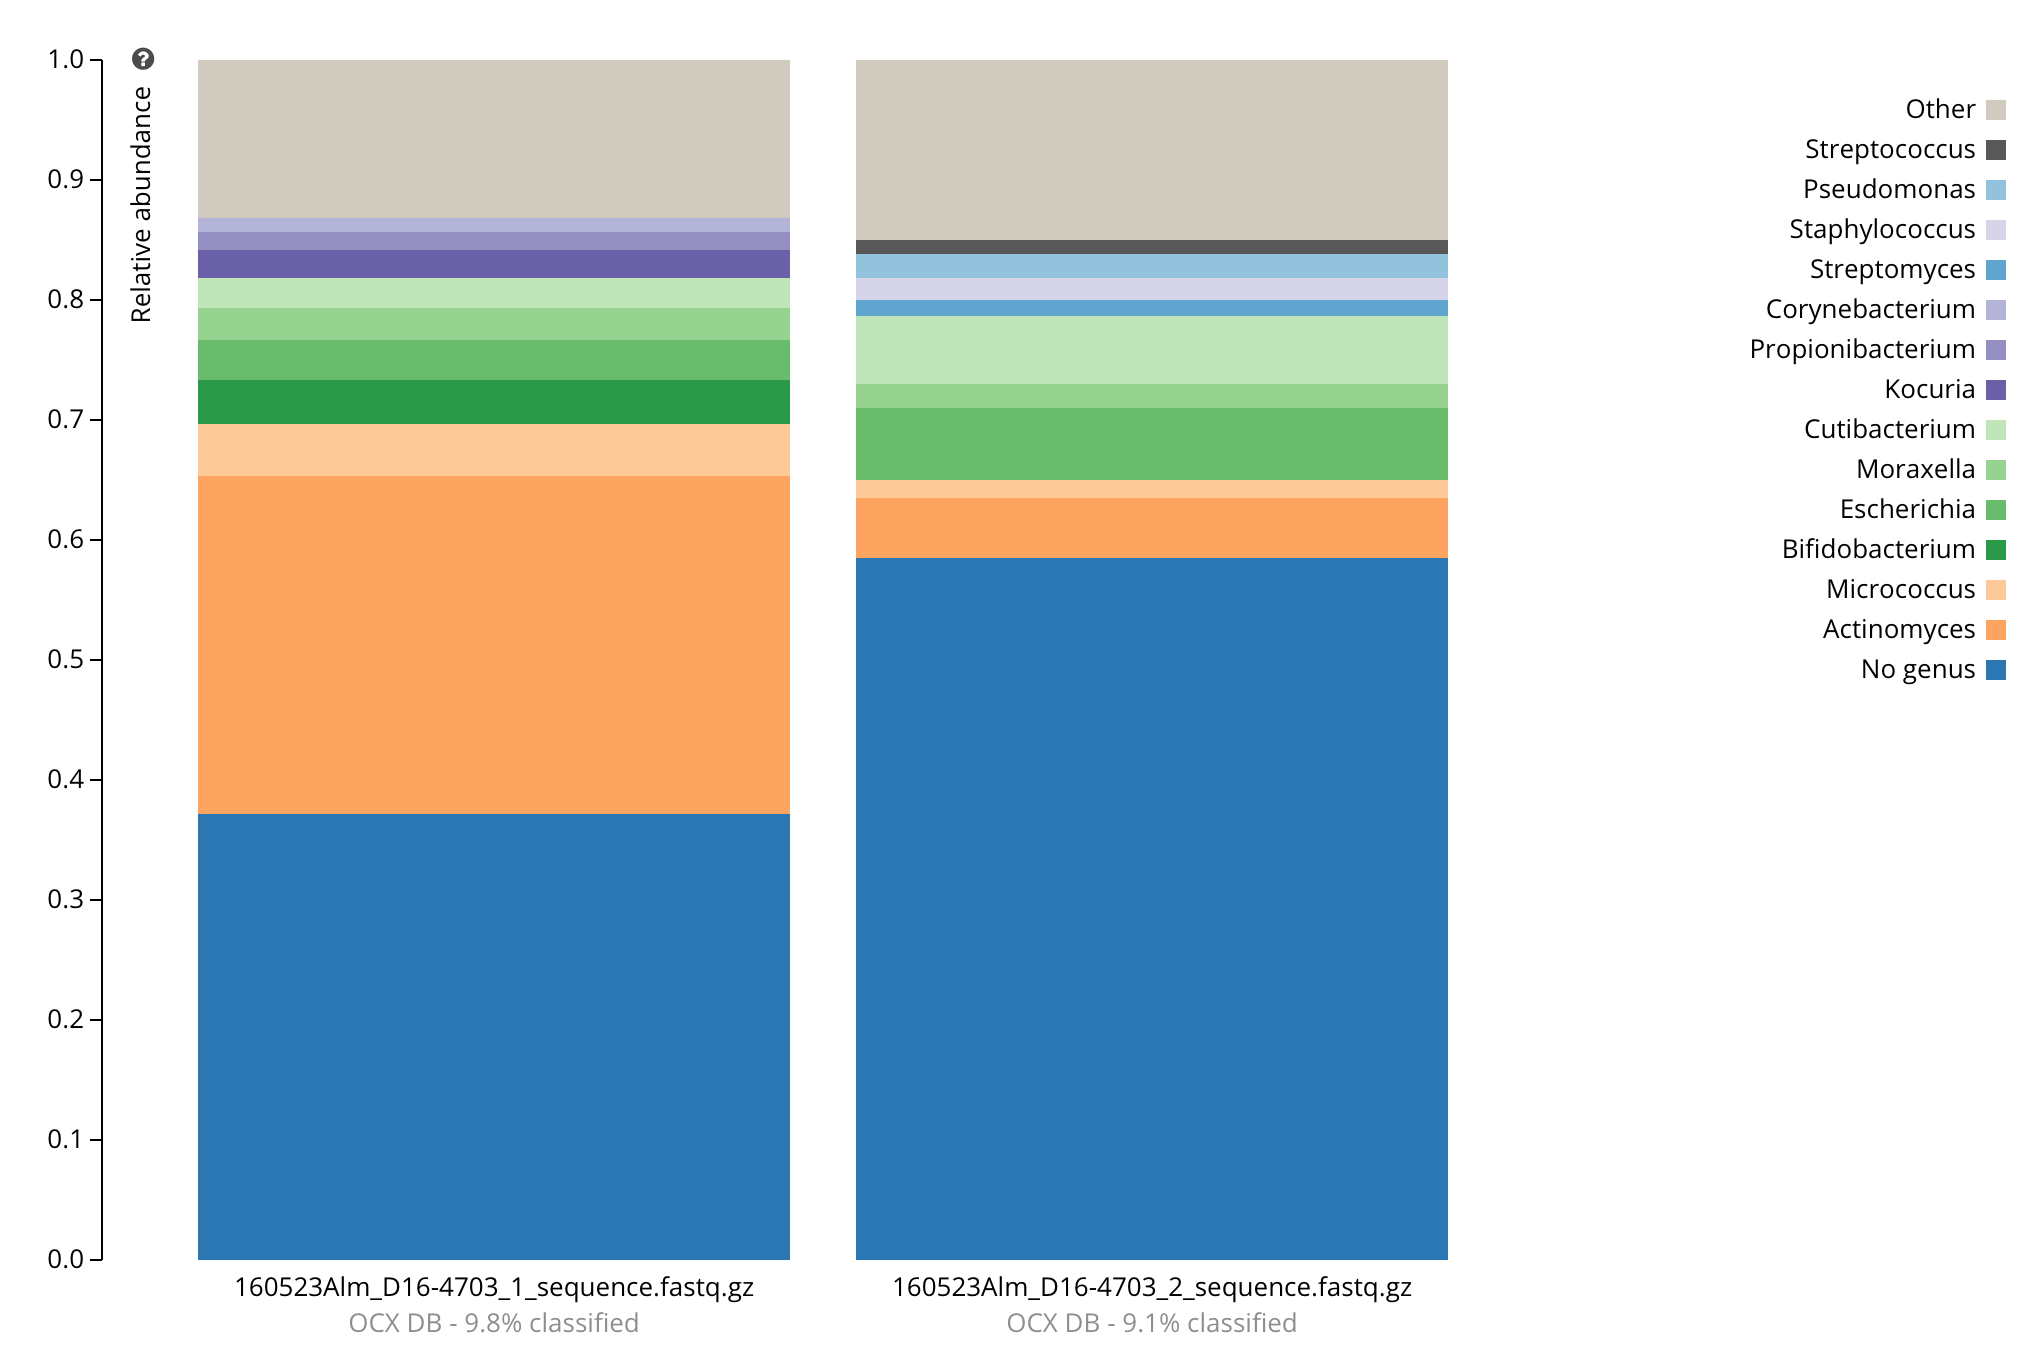

In [11]:
img7 = Image(filename = "img/genus.PNG")
img7

> From the above output, we can infer that while there's a large proportion of no genus assigend in the fastq, the general category of ditribution is similar, in that Actinomyces, Micrococcus, and Escherichia dominate. However, the proportation of Actinomyces is different between the two sampling. These abundance difference may be a result of sequencing bias or dataset bias of one codex.

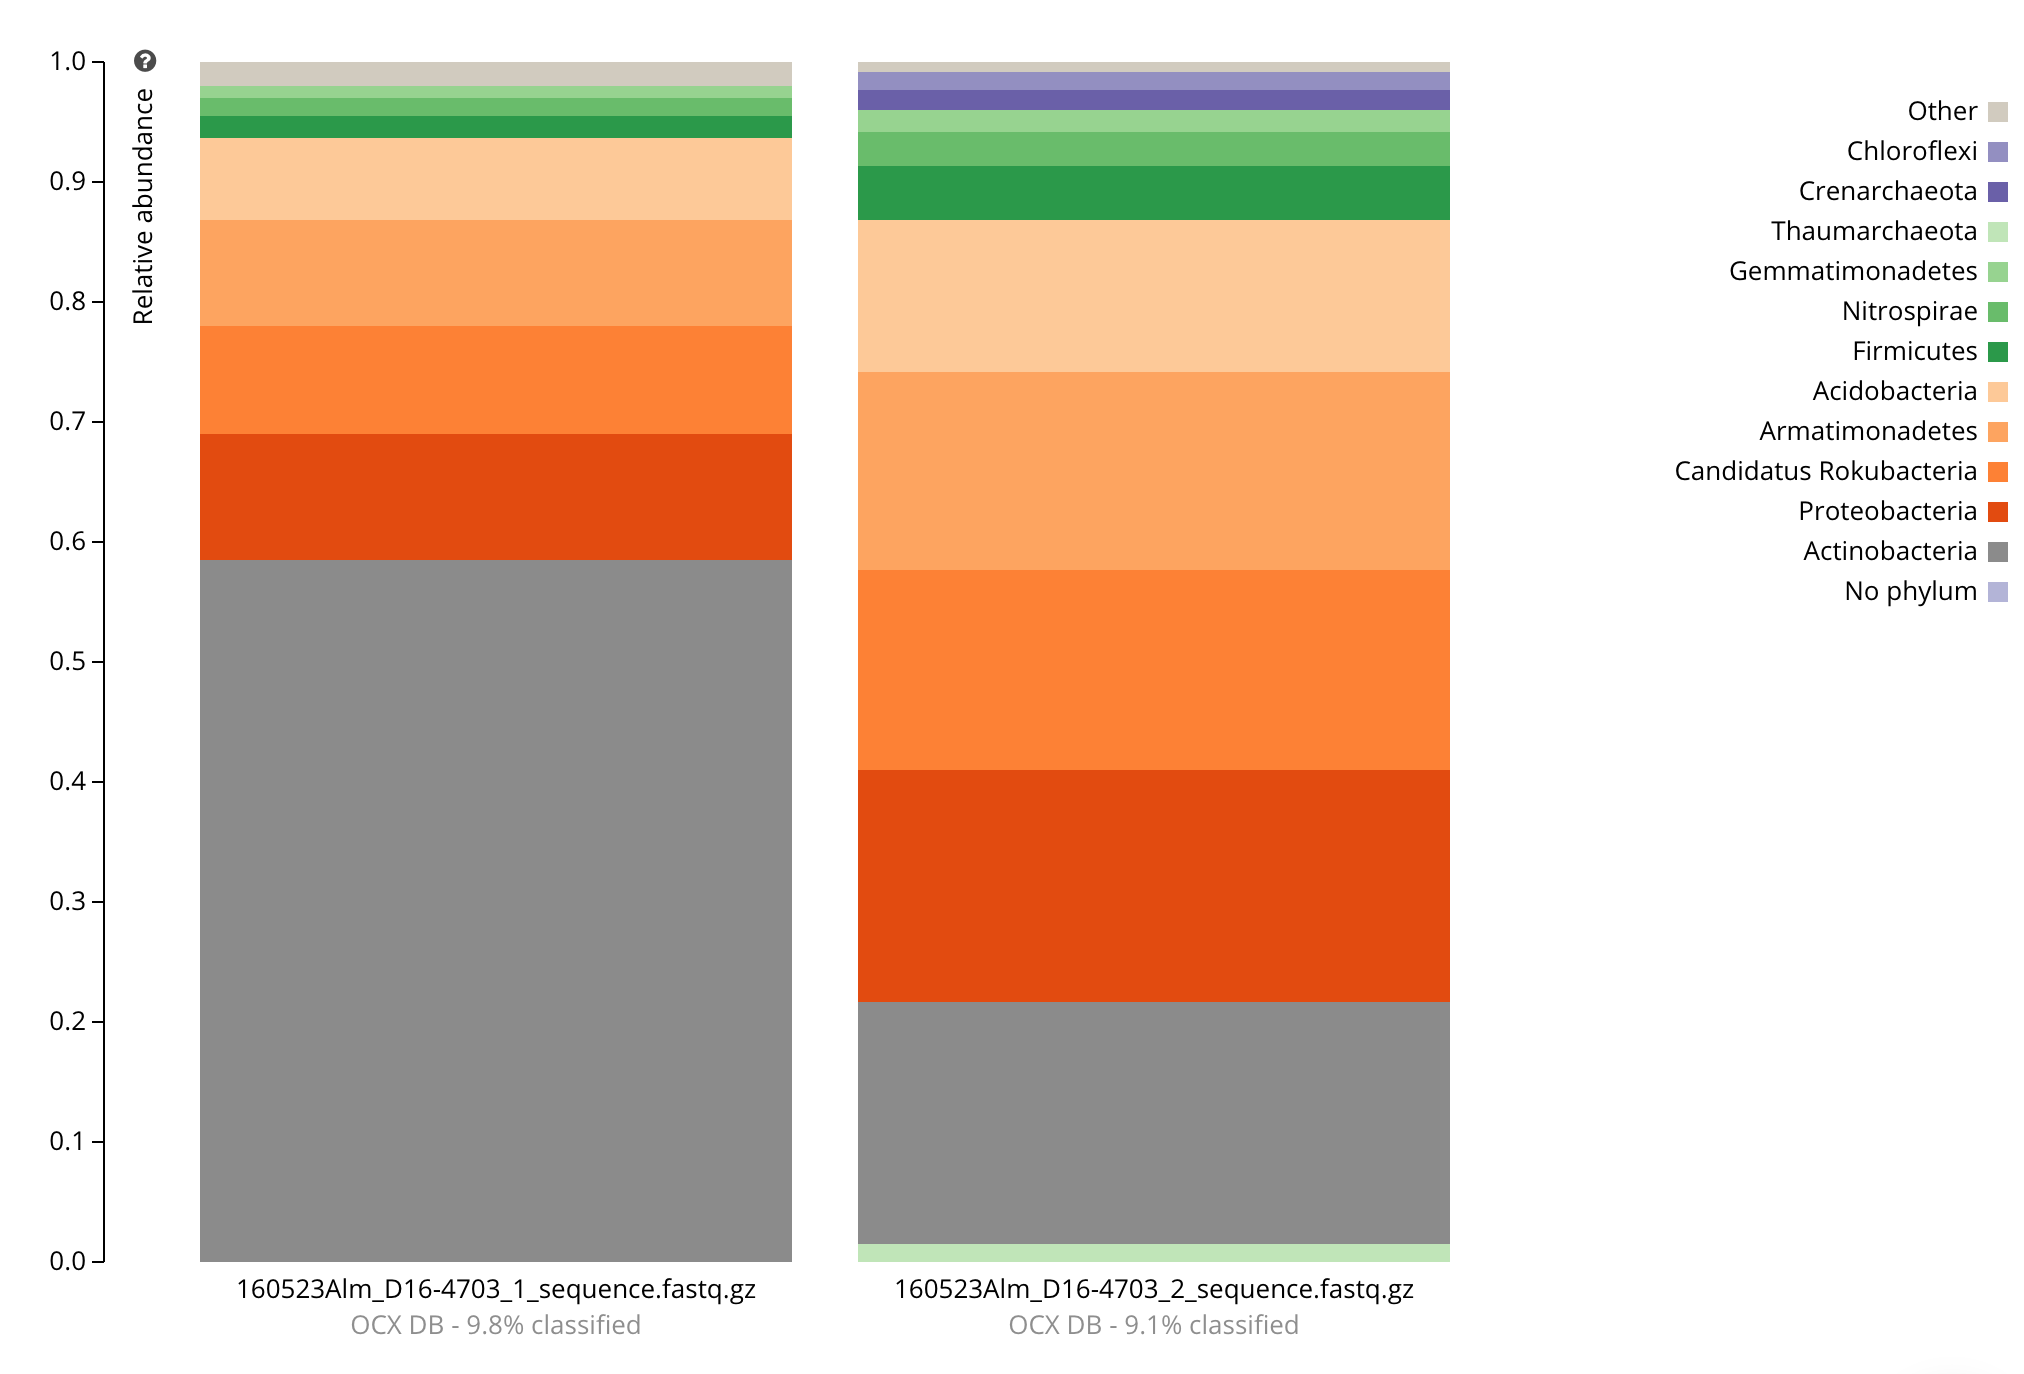

In [12]:
img8 = Image(filename = "img/phylum.PNG")
img8

From the above output, we can infer that while there's a large proportion of no phylum assigend in the fastq, the general category of ditribution is similar, in that Proteobacteria, Actinobacteria, Marmatimonadetes, and acidobacteria dominate. However, the proportation of Proteobacteria is different between the two sampling. These abundance difference may be a result of sequencing bias or dataset bias of one codex.

## Spades run analysis
`cat 160523Alm_D16-4703_2_sequence.fastq | head -5000000 | gzip > test_reads_2.fastq.gz`  
`cat 160523Alm_D16-4703_1_sequence.fastq | head -5000000 | gzip > test_reads_1.fastq.gz`  
`spades -1 test_reads_2.fastq.gz -2 test_reads_1.fastq.gz --meta -o spades_final_proj_output`

## Assembly-stats
- Using the assembly-stats program, calculate statistics on both your contigs and scaffolds file
- Report the total length of all contigs (or scaffolds), the number of contigs (or scaffolds), and the N50 

Code Line: output a tabular analysis with headers
`scp -r /Users/changhua/downloads/SPAdes-3.13.0-Darwin/bin/spades_final_proj_output be131-01@bioe131.com:fa18-BioE131/
`  
`assembly-stats -t ./scaffolds.fasta ./contigs.fasta > ./assembly_stats_report.txt`

`scp be131-01@bioe131.com:fa18-BioE131/spades_final_proj_output/assembly_stats_report.txt /Users/changhua/desktop/fa18-BioE131/final/checkpoint1/`

In [2]:
import pandas as pd
data = pd.read_csv('assembly_stats_report.txt',sep = "	")
data

,filename,total_length,number,mean_length,longest,shortest,N_count,Gaps,N50,N50n,N70,N70n,N90,N90n
0,./scaffolds.fasta,93996807,369721,254.24,5532,55,6690,660,263,122599,236,198063,206,282956
1,./contigs.fasta,93990117,370381,253.77,4581,55,0,0,263,123238,236,198719,206,283617


- Extract the coverage from each FASTA header
code: apply grep and awk, use ">" to separate each fasta, "_" to separate names, and print the name, length and coverage field
`grep '^>'  contigs.fasta | awk -F _  'BEGIN {OFS="\t"} {print $0,$4,$6}'> contig_cov.csv`
- plot a histogram of coverage for all contigs in your assembly

                               name  length  Coverage
1  >NODE_2_length_4289_cov_5.656117    4289  5.656117
2  >NODE_3_length_3988_cov_3.358505    3988  3.358505
3  >NODE_4_length_3973_cov_2.678663    3973  2.678663
4  >NODE_5_length_3735_cov_2.843478    3735  2.843478


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1439e8>]],
      dtype=object)

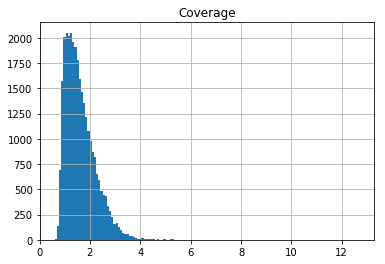

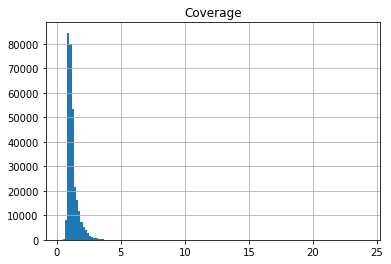

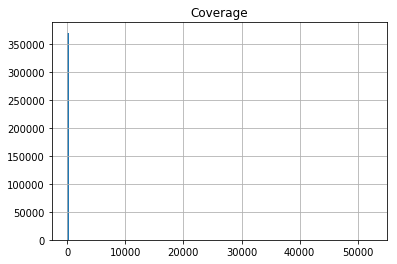

In [19]:
import pandas as pd
data = pd.read_csv('contig_cov.csv',sep = "	", header = None,names = ["name", "length","Coverage"])
# A demonstration of the first five lines
print(data[1:5])

# removing the single extremely high anomaly (multiple G and multiple T)for a closer look
cov1 = data[0:30000][["Coverage"]]
cov1.hist(bins=140)

cov2 = data[0:300000][["Coverage"]]
cov2.hist(bins=140)

cov3 = data[0:370000][["Coverage"]]
cov3.hist(bins=140)

## MG-RAST Annotation